In [8]:

# Load the NeuroKit package and other useful packages
import neurokit2 as nk
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [52]:
plt.rcParams['figure.figsize'] = [30, 10]  # Bigger images

In [9]:
df = pd.read_csv('TEST_Session6_Shimmer_608E_Calibrated_PC_data.csv')

In [15]:
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)
# eda_signal = [df['Shimmer_608E_GSR_Skin_Conductance_CAL']]

In [35]:
bsln = df[df['State'] == 'BASELINE']
non_bsln = df[df['State']!= 'BASELINE' ]
non_bsln = non_bsln[non_bsln['State'] != 'def']

bsln_data_arr = [float(num) for num in bsln['Shimmer_608E_GSR_Skin_Conductance_CAL'] ]
non_bsln_data_arr = [float(num) for num in non_bsln['Shimmer_608E_GSR_Skin_Conductance_CAL'] ]

In [50]:
def _create(eda_signal, sr = 50):
    # Process the raw EDA signal
    signals, info = nk.eda_process(eda_signal, sampling_rate=sr)
    
    # Extract clean EDA and SCR features
    cleaned = signals["EDA_Clean"]
    features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
    
    
    # Visualize SCR features in cleaned EDA signal
    plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])
    
    # Filter phasic and tonic components
    data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=sr)
    
    data["EDA_Raw"] = eda_signal  # Add raw signal
    data.plot()
    
    # Plot EDA signal
    try:
        plot = nk.eda_plot(signals)
    except Exception as e:
        print(str(e))


In [65]:
def _create_all(df, col, sr = 50):
    bsln = df[df['State'] == 'BASELINE']
    non_bsln = df[df['State']!= 'BASELINE' ]
    non_bsln = non_bsln[non_bsln['State'] != 'def']
    all_data = df[df['State'] != 'def']

    bsln_data_arr = [float(num) for num in bsln[col] ]
    non_bsln_data_arr = [float(num) for num in non_bsln[col] ]
    all_data_arr = [float(num) for num in all_data[col] ]
    
    print('-------------ALL DATA----------------')
    _create(all_data_arr)
    print('-------------BASELINE DATA-----------')
    _create(bsln_data_arr)
    print('---------NON BASELINE DATA-----------')
    _create(non_bsln_data_arr)

-------------ALL DATA----------------


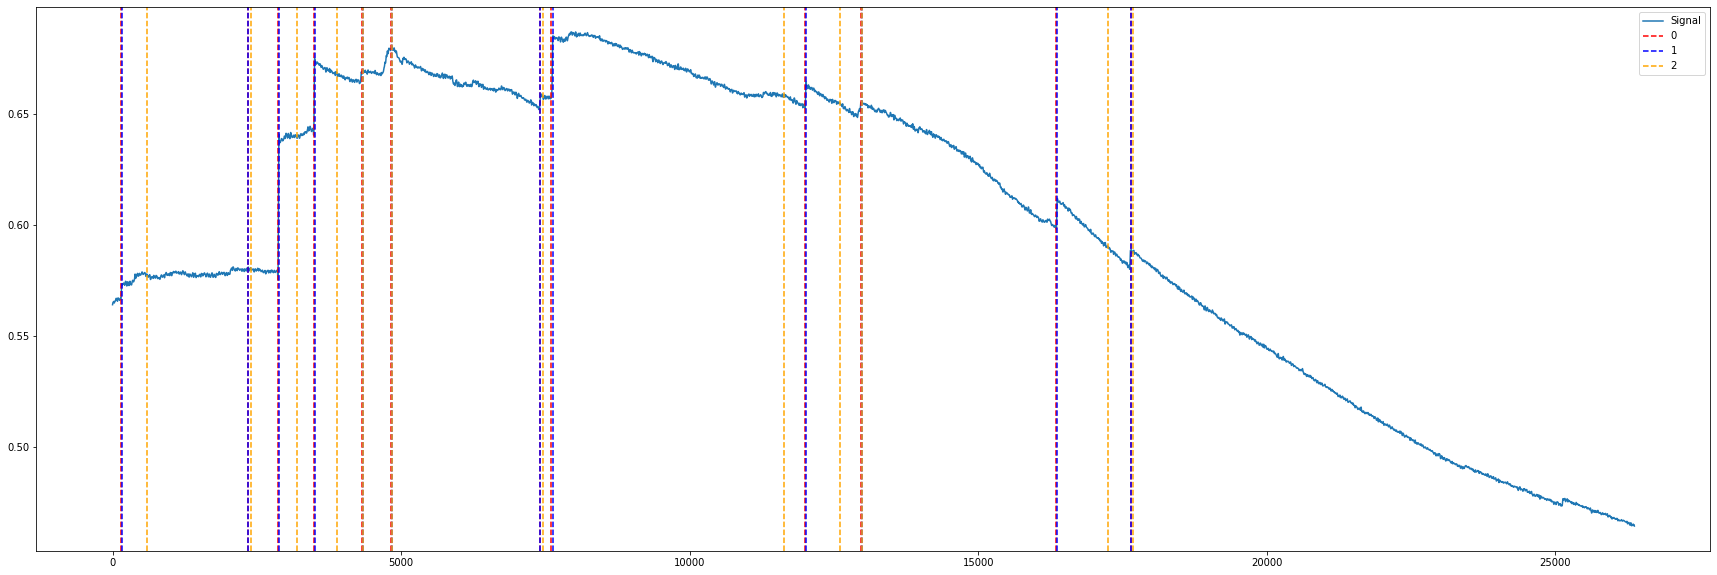

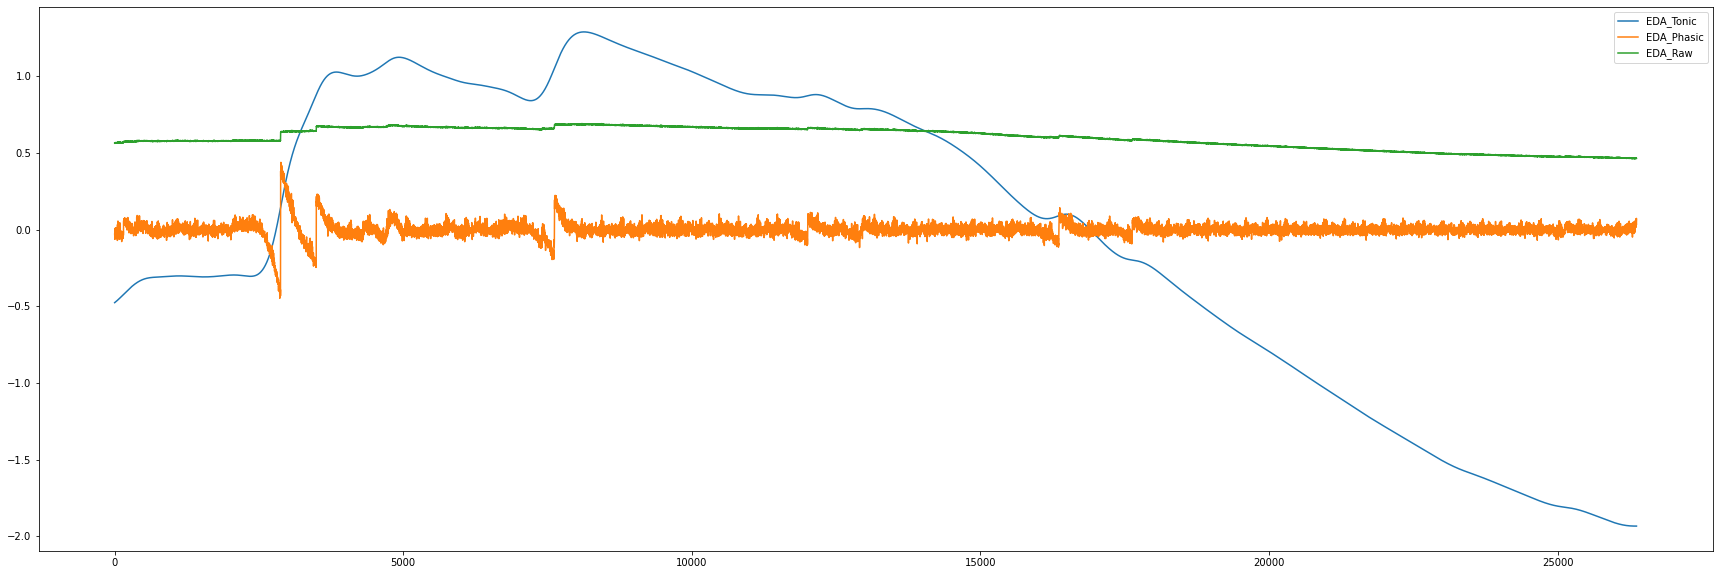

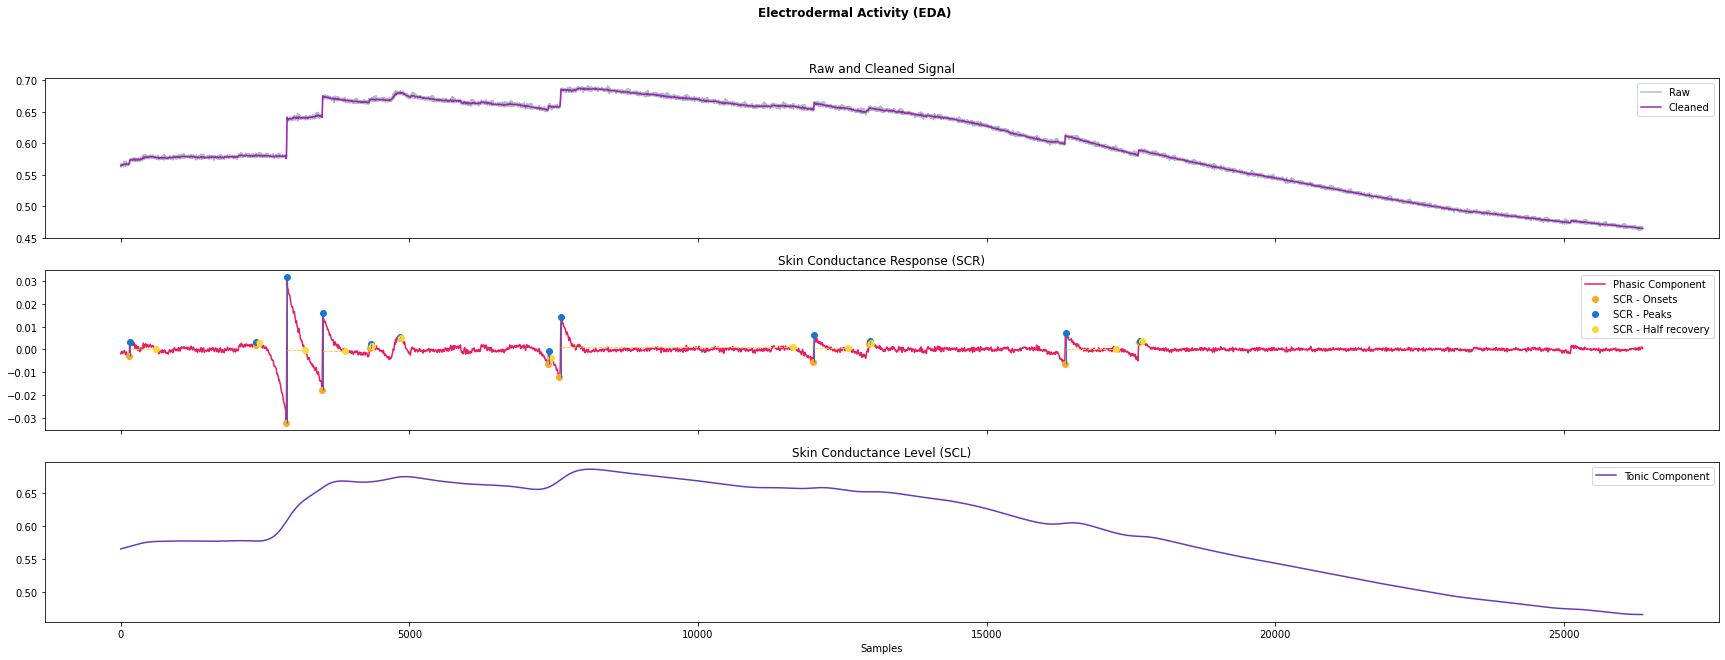

-------------BASELINE DATA-----------


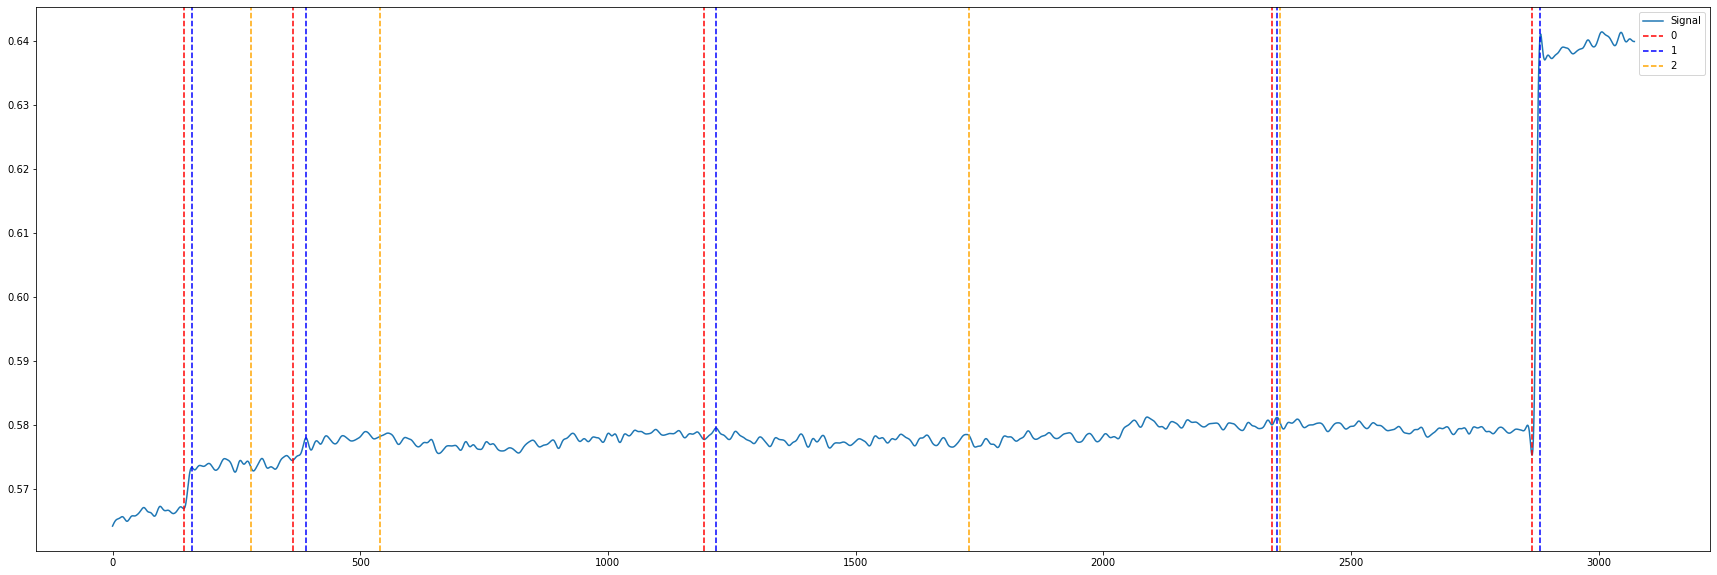

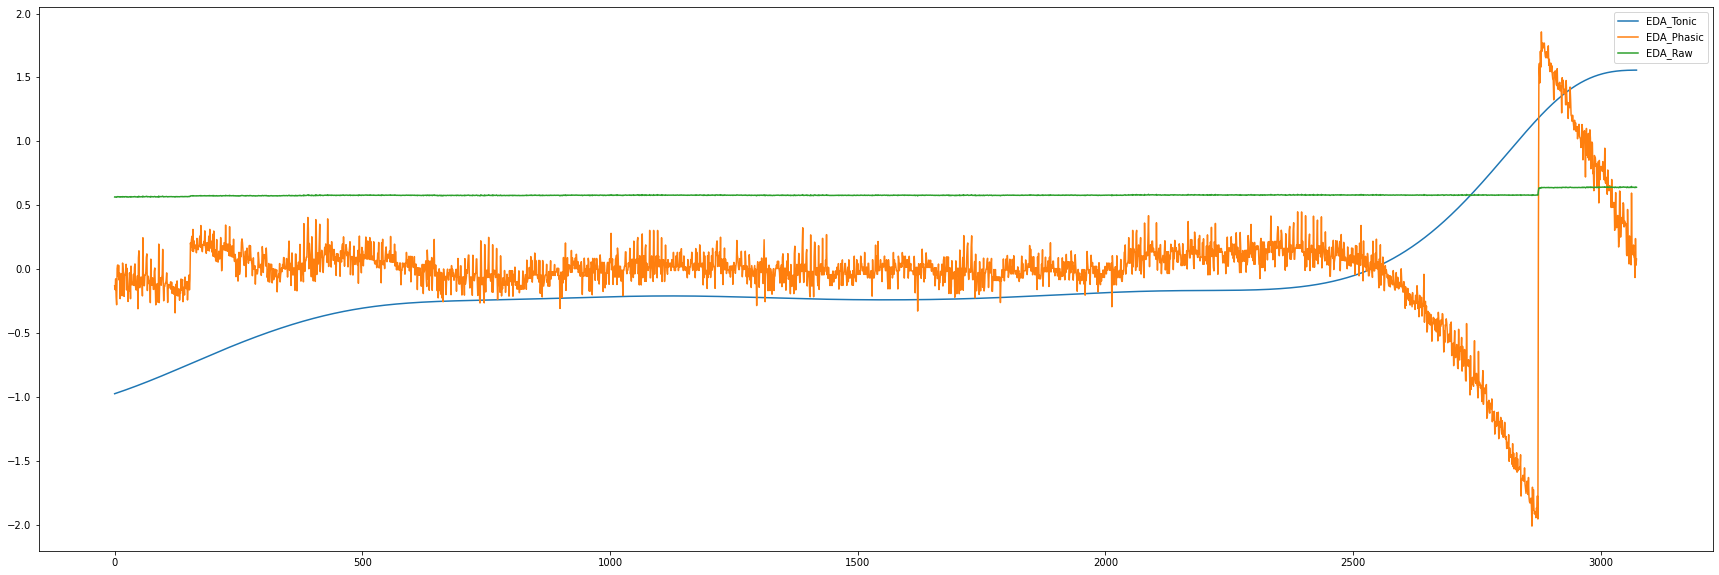

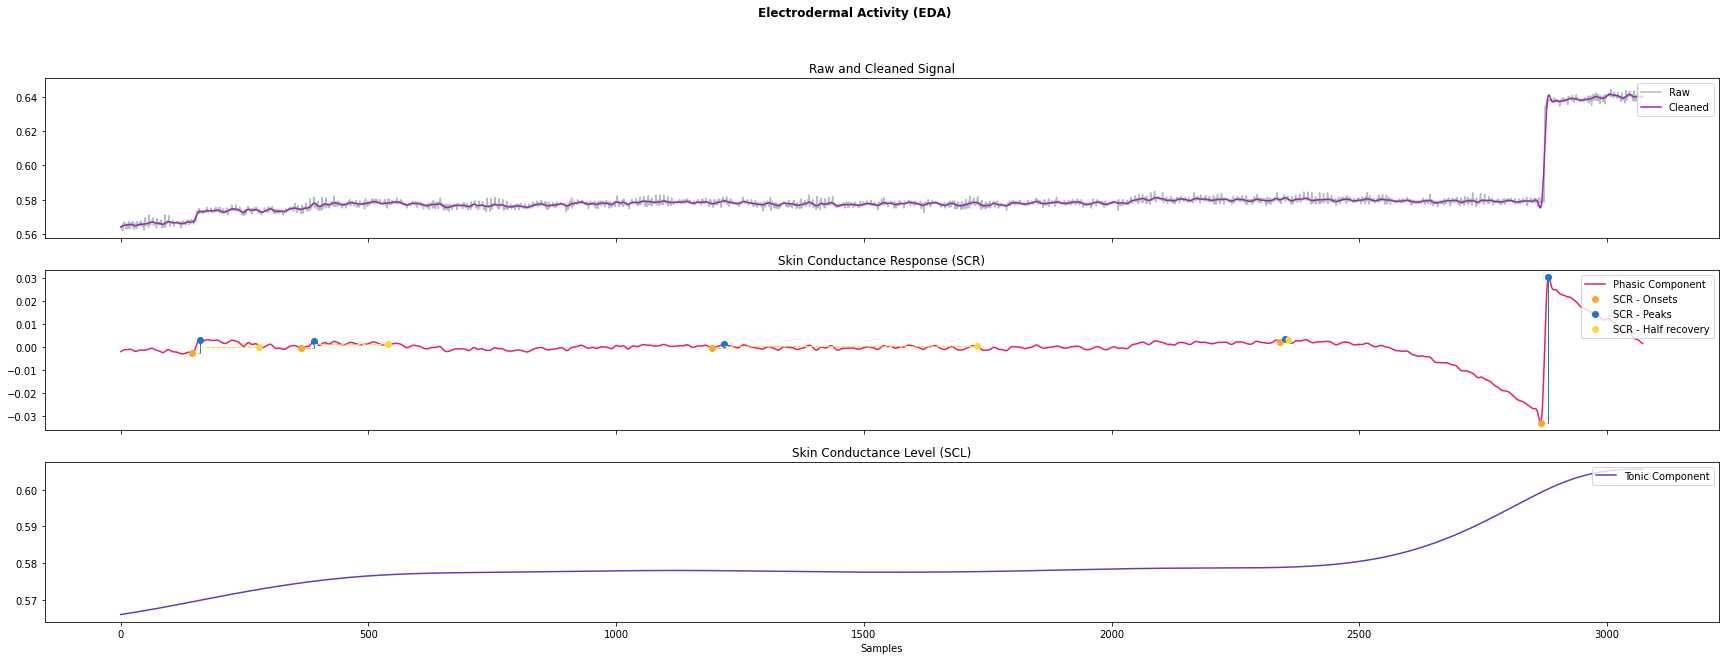

---------NON BASELINE DATA-----------
Length of passed values is 17, index implies 18.


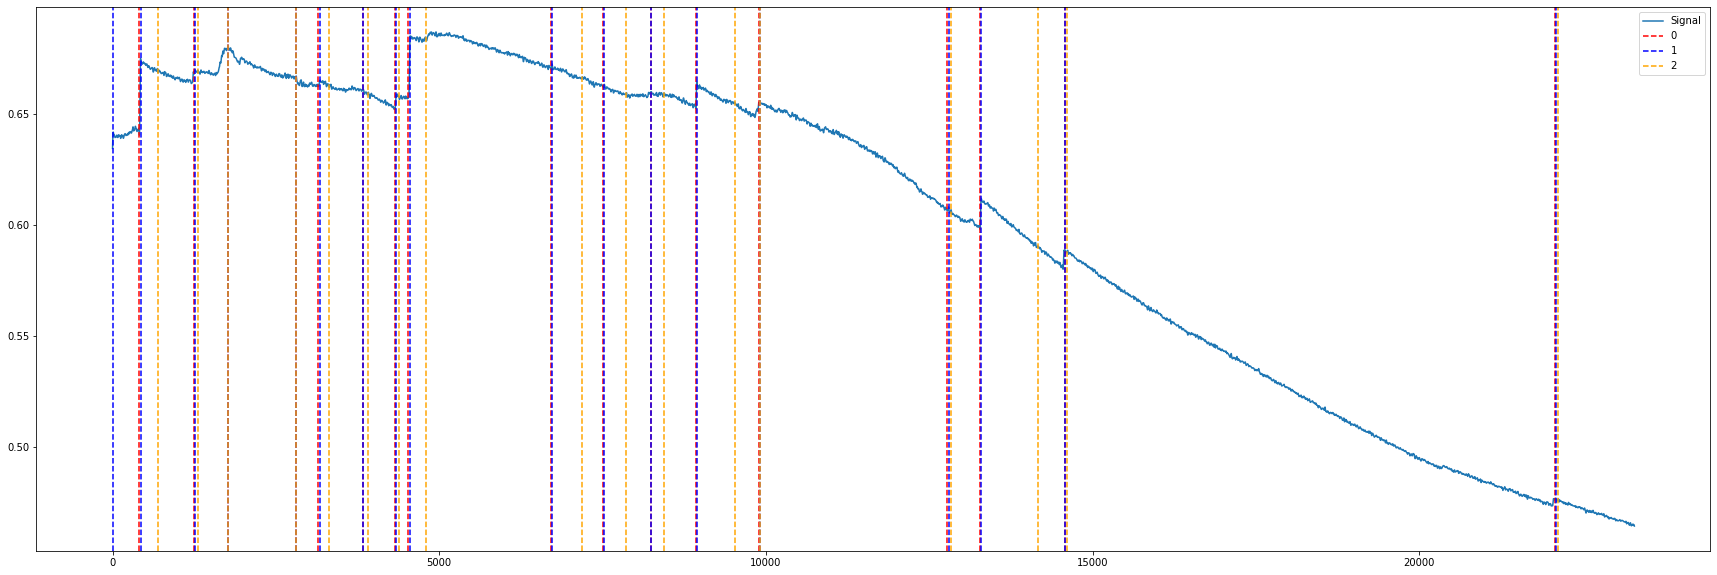

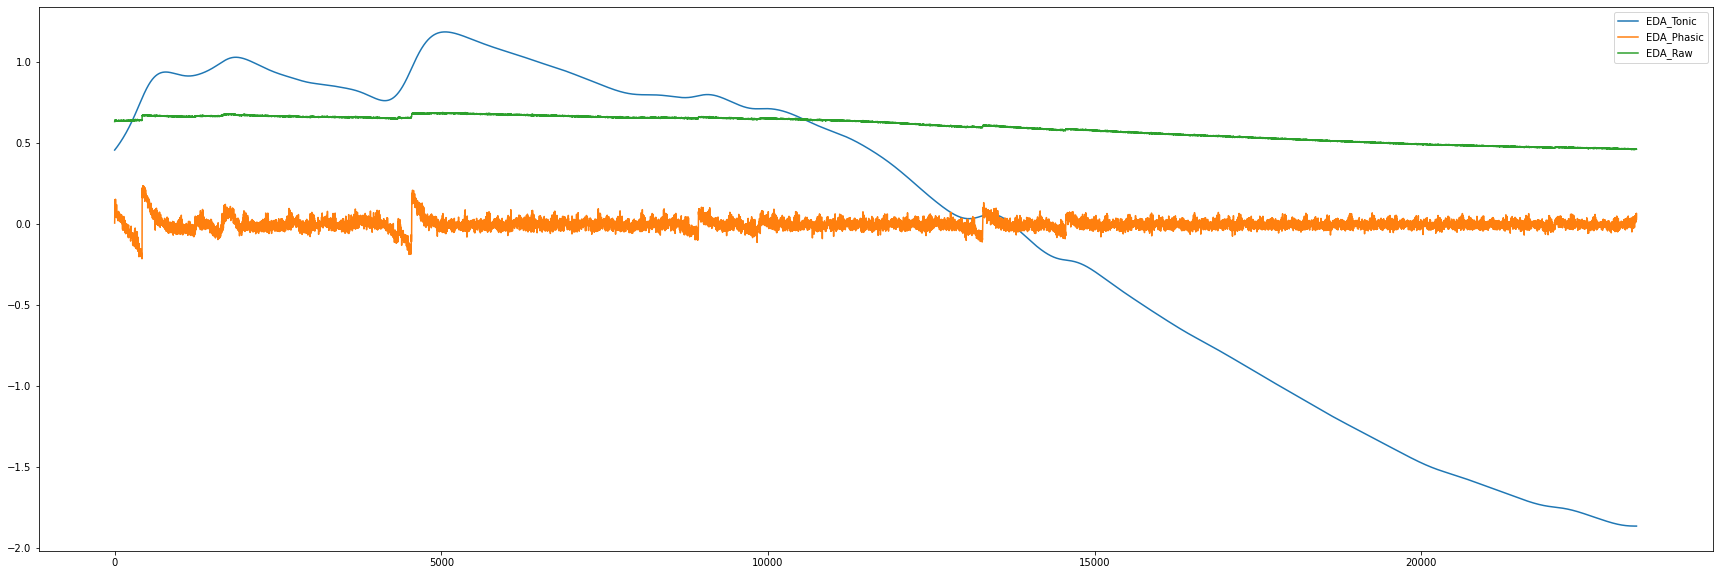

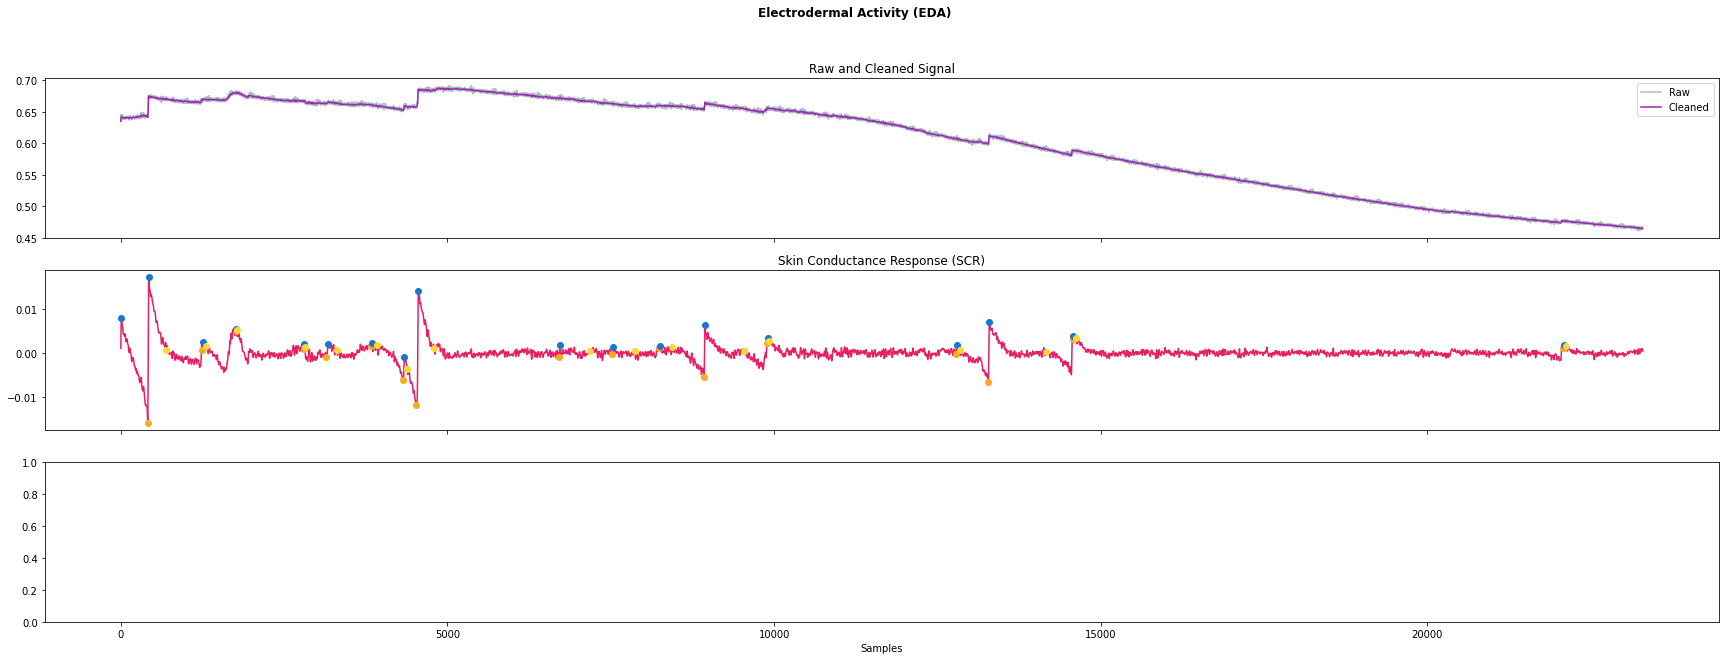

In [66]:
_create_all(df, 'Shimmer_608E_GSR_Skin_Conductance_CAL')